<a href="https://colab.research.google.com/github/AvivGelfand/Blockchain-Research/blob/main/SurveyResultsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Survey Results

# Libraries

In [170]:
# Basic
import pandas as pd
import numpy as np
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# Preprocessing for ML
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# accuracy score for logistic regression
from sklearn.metrics import accuracy_score # we will use it for calculating accuracy of our calssifications
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Data Set

In [139]:
df = pd.read_csv("https://raw.githubusercontent.com/AvivGelfand/datapool/main/ResultsThin.csv")
# df.head(3)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Duration_min       249 non-null    float64
 1   TIPI_1             249 non-null    int64  
 2   TIPI_2             249 non-null    int64  
 3   TIPI_3             249 non-null    int64  
 4   TIPI_4             249 non-null    int64  
 5   TIPI_5             249 non-null    int64  
 6   TIPI_6             249 non-null    int64  
 7   TIPI_7             249 non-null    int64  
 8   TIPI_8             249 non-null    int64  
 9   TIPI_9             249 non-null    int64  
 10  TIPI_10            249 non-null    int64  
 11  gender             249 non-null    int64  
 12  age_bin            249 non-null    object 
 13  marital_status     249 non-null    object 
 14  graduation_level   249 non-null    object 
 15  employment_status  249 non-null    object 
 16  bonus_amount       249 non

# Encoding values


## Age Categories Encoding (Ordinal)

In [141]:
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv("https://raw.githubusercontent.com/AvivGelfand/datapool/main/ResultsThin.csv")


age_bin_ordinal_encoder = OrdinalEncoder( # instance of an ordinal encoder
    categories=[
                ['18 - 24 years old','25 - 34 years old','35 - 44 years old','45 - 54 years old', '55 - 64 years old', '65+  years old'],
                # ['Less than high school degree','High school graduate (high school diploma or equivalent including GDE)',
                #  'Some college but no degree','Bachelor\'s degree', 'Master\'s degree', 'Phd']
              ]  # inputing the wanted order of importance in a [[]] array
) 

graduation_level_ordinal_encoder = OrdinalEncoder( # instance of an ordinal encoder
    categories=[
                # ['         0     ','                   1                                                             '
                ['Less than high school degree','High school graduate (high school diploma or equivalent including GDE)',
                #  ,'2',                                 '3',                 '4',       '5'],
                 'Some college but no degree','Bachelor\'s degree', 'Master\'s degree', 'Phd']
              ]  # inputing the wanted order of importance in a [[]] array
) 

df['age_bin'] = age_bin_ordinal_encoder.fit_transform(df['age_bin'].values.reshape(-1, 1))

df['graduation_level'] = graduation_level_ordinal_encoder.fit_transform(df['graduation_level'].values.reshape(-1, 1))

df.head(3)

,Duration_min,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,gender,age_bin,marital_status,graduation_level,employment_status,bonus_amount,agreed_to_sell
0,5.12,7,5,6,4,6,5,7,1,3,1,0,4.0,Living with a partner,5.0,Working part-time,5.0,1
1,9.88,4,1,6,2,5,6,6,1,7,1,1,4.0,Married,4.0,Working full-time,7.5,0
2,9.78,4,5,6,5,4,2,7,1,3,3,0,1.0,Married,3.0,Working full-time,2.0,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Duration_min       249 non-null    float64
 1   TIPI_1             249 non-null    int64  
 2   TIPI_2             249 non-null    int64  
 3   TIPI_3             249 non-null    int64  
 4   TIPI_4             249 non-null    int64  
 5   TIPI_5             249 non-null    int64  
 6   TIPI_6             249 non-null    int64  
 7   TIPI_7             249 non-null    int64  
 8   TIPI_8             249 non-null    int64  
 9   TIPI_9             249 non-null    int64  
 10  TIPI_10            249 non-null    int64  
 11  gender             249 non-null    int64  
 12  age_bin            249 non-null    float64
 13  marital_status     249 non-null    object 
 14  graduation_level   249 non-null    float64
 15  employment_status  249 non-null    object 
 16  bonus_amount       249 non

In [143]:
df.describe()

,Duration_min,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,gender,age_bin,graduation_level,bonus_amount,agreed_to_sell
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,30.902410,4.116466,3.554217,4.702811,3.244980,5.008032,4.032129,5.317269,2.345382,4.646586,2.979920,0.337349,2.481928,3.313253,6.154618,0.385542
std,270.459045,1.477823,1.502039,1.745972,1.539868,1.355966,1.453226,1.382401,1.417485,1.527833,1.548802,0.473758,1.437079,0.722803,3.564949,0.487703
min,2.270000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.580000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000,5.000000,1.000000,4.000000,2.000000,0.000000,1.000000,3.000000,3.500000,0.000000
50%,7.180000,4.000000,4.000000,5.000000,3.000000,5.000000,4.000000,6.000000,2.000000,5.000000,3.000000,0.000000,2.000000,3.000000,7.500000,0.000000
75%,10.250000,5.000000,5.000000,6.000000,4.000000,6.000000,5.000000,6.000000,3.000000,6.000000,4.000000,1.000000,4.000000,4.000000,10.000000,1.000000
max,4251.480000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000,5.000000,5.000000,10.000000,1.000000


In [144]:
df.describe(include=np.object)

,marital_status,employment_status
count,249,249
unique,5,12
top,Married,Working full-time
freq,164,161


In [145]:
df[['age_bin', 'graduation_level']]

,age_bin,graduation_level
0,4.0,5.0
1,4.0,4.0
2,1.0,3.0
3,2.0,4.0
4,1.0,3.0
...,...,...
244,3.0,4.0
245,4.0,3.0
246,1.0,3.0
247,1.0,3.0


## **Encoding TIPI**

In [146]:
def update_users_dict(df):
    new_cols = ['extraverted', 'introverted', "critical", "sympathetic", "self-disciplined", "careless", "anxious", "mentally_stable", "open_minded", "close_minded"]
    df[new_cols] = 0
    
    for item in range(len(df)):
      if (df["TIPI_1"][item] == 6 or df["TIPI_1"][item] == 7) and \
              (df["TIPI_6"][item] == 1 or df["TIPI_6"][item] == 2):
                    df['extraverted'][item] = 1
      elif (df["TIPI_1"][item] == 1 or df["TIPI_1"][item] == 2) and \
              (df["TIPI_6"][item] == 6 or df["TIPI_6"][item] == 7):
                    df['introverted'][item] = 1

      if (df["TIPI_2"][item] == 1 or df["TIPI_2"][item] == 2) and \
              (df["TIPI_7"][item] == 6 or df["TIPI_7"][item] == 7):
                    df['sympathetic'][item] = 1

      elif (df["TIPI_2"][item] == 6 or df["TIPI_2"][item] == 7) and \
              (df["TIPI_7"][item] == 1 or df["TIPI_7"][item] == 2):
                    df['critical'][item] = 1

      if (df["TIPI_3"][item] == 6 or df["TIPI_3"][item] == 7) and \
              (df["TIPI_8"][item] == 1 or df["TIPI_8"][item] == 2):
                    df['self-disciplined'][item] = 1

      elif (df["TIPI_3"][item] == 1 or df["TIPI_3"][item] == 2) and \
              (df["TIPI_8"][item] == 6 or df["TIPI_8"][item] == 7):
                    df['careless'][item] = 1

      if (df["TIPI_4"][item] == 1 or df["TIPI_4"][item] == 2) and \
              (df["TIPI_9"][item] == 6 or df["TIPI_9"][item] == 7):
                    df['mentally_stable'][item] = 1

      elif (df["TIPI_4"][item] == 6 or df["TIPI_4"][item] == 7) and \
              (df["TIPI_9"][item] == 1 or df["TIPI_9"][item] == 2):
                    df['anxious'][item] = 1

      if (df["TIPI_5"][item] == 6 or df["TIPI_5"][item] == 7) and \
              (df["TIPI_10"][item] == 1 or df["TIPI_10"][item] == 2):
                    df['open_minded'][item] = 1

      elif (df["TIPI_5"][item] == 1 or df["TIPI_5"][item] == 2) and \
              (df["TIPI_10"][item] == 6 or df["TIPI_10"][item] == 7):
                    df['close_minded'][item] = 1

update_users_dict(df);

In [147]:
df = df.drop(['TIPI_1',	'TIPI_2',	'TIPI_3',	'TIPI_4'	,'TIPI_5'	,'TIPI_6'	,'TIPI_7',	'TIPI_8',	'TIPI_9', 'TIPI_10'], axis=1)
df.head(2)

,Duration_min,gender,age_bin,marital_status,graduation_level,employment_status,bonus_amount,agreed_to_sell,extraverted,introverted,critical,sympathetic,self-disciplined,careless,anxious,mentally_stable,open_minded,close_minded
0,5.12,0,4.0,Living with a partner,5.0,Working part-time,5.0,1,0,0,0,0,1,0,0,0,1,0
1,9.88,1,4.0,Married,4.0,Working full-time,7.5,0,0,0,0,1,1,0,0,1,0,0


In [148]:
df[['careless','close_minded' ]]

,careless,close_minded
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
244,0,0
245,0,0
246,0,0
247,0,0


In [149]:
df[['careless','close_minded' ]].value_counts()

careless  close_minded
0         0               248
1         1                 1
dtype: int64

In [150]:
any(df.close_minded != df.careless)

False

# Exploratory Data Analysis

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Duration_min       249 non-null    float64
 1   gender             249 non-null    int64  
 2   age_bin            249 non-null    float64
 3   marital_status     249 non-null    object 
 4   graduation_level   249 non-null    float64
 5   employment_status  249 non-null    object 
 6   bonus_amount       249 non-null    float64
 7   agreed_to_sell     249 non-null    int64  
 8   extraverted        249 non-null    int64  
 9   introverted        249 non-null    int64  
 10  critical           249 non-null    int64  
 11  sympathetic        249 non-null    int64  
 12  self-disciplined   249 non-null    int64  
 13  careless           249 non-null    int64  
 14  anxious            249 non-null    int64  
 15  mentally_stable    249 non-null    int64  
 16  open_minded        249 non

In [152]:
df.describe()

,Duration_min,gender,age_bin,graduation_level,bonus_amount,agreed_to_sell,extraverted,introverted,critical,sympathetic,self-disciplined,careless,anxious,mentally_stable,open_minded,close_minded
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,30.902410,0.337349,2.481928,3.313253,6.154618,0.385542,0.044177,0.048193,0.008032,0.164659,0.301205,0.004016,0.016064,0.184739,0.261044,0.004016
std,270.459045,0.473758,1.437079,0.722803,3.564949,0.487703,0.205901,0.214605,0.089441,0.371619,0.459706,0.063372,0.125976,0.388867,0.440089,0.063372
min,2.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.580000,0.000000,1.000000,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.180000,0.000000,2.000000,3.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.250000,1.000000,4.000000,4.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4251.480000,1.000000,5.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Bottom Line 0

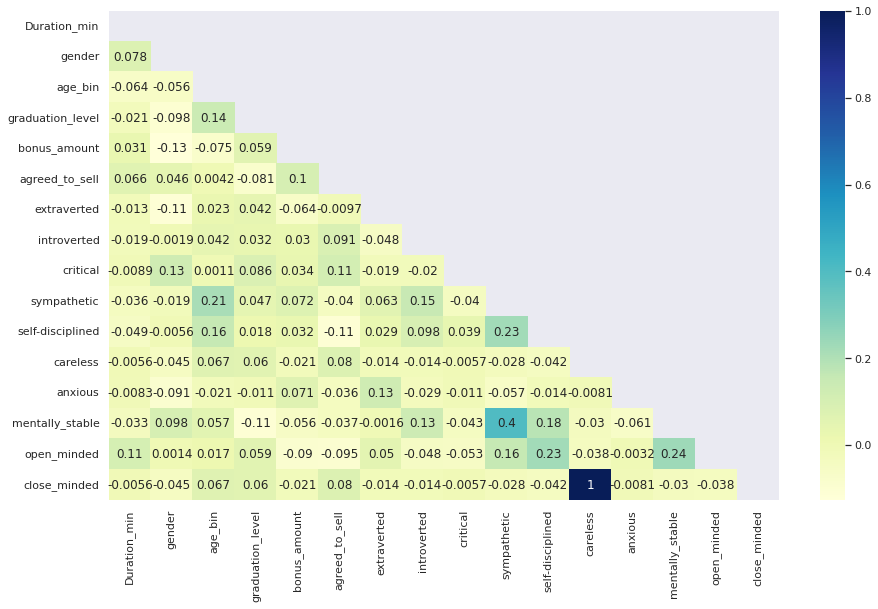

In [154]:
sns.set(rc={'figure.figsize':(15,9)})
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=np.triu(df.corr()))

Correlated: 
* Bonus ammount ~ agreed to sell: 0.1 - weak and positive
*  careless ~ close minded : 1  - random


In [155]:
corsell = df.corr()[['agreed_to_sell']].sort_values('agreed_to_sell', ascending=False).T.iloc[:,1:]

df.corr()[['agreed_to_sell']].sort_values('agreed_to_sell', ascending=False).T.iloc[:,1:]

,critical,bonus_amount,introverted,careless,close_minded,Duration_min,gender,age_bin,extraverted,anxious,mentally_stable,sympathetic,graduation_level,open_minded,self-disciplined
agreed_to_sell,0.1136,0.100089,0.091441,0.080165,0.080165,0.065846,0.045627,0.004228,-0.009676,-0.035583,-0.036887,-0.040208,-0.080897,-0.095066,-0.106394


# Bottom Line 1

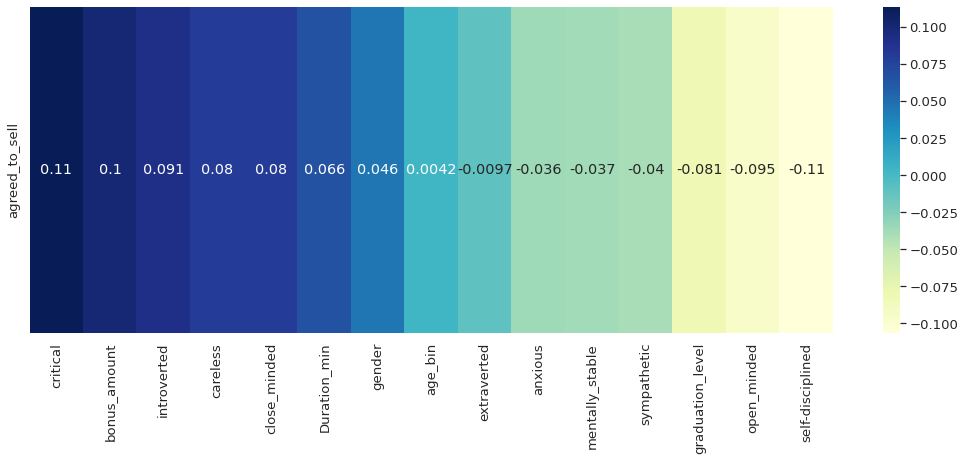

In [110]:
sns.set(rc={'figure.figsize':(18,6)}, font_scale=1.2)
ax = sns.heatmap(corsell, cmap="YlGnBu", annot=True)

In [111]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['Duration_min', 'gender', 'age_bin', 'graduation_level', 'bonus_amount',
       'agreed_to_sell', 'extraverted', 'introverted', 'critical',
       'sympathetic', 'self-disciplined', 'careless', 'anxious',
       'mentally_stable', 'open_minded', 'close_minded'],
      dtype='object')

#Bottom Line 2

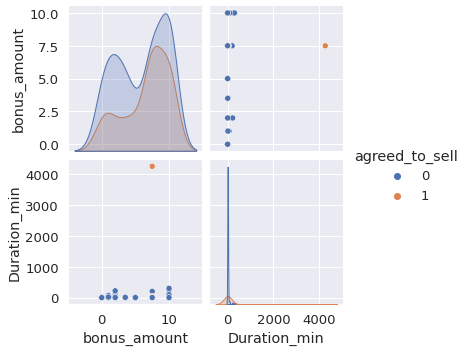

In [168]:
sns.set(rc={'figure.figsize':(30,10)}, font_scale=1.2)

sns.pairplot(df, vars = ['bonus_amount', 'Duration_min'], hue = "agreed_to_sell");

In [113]:
df.head()

,Duration_min,gender,age_bin,marital_status,graduation_level,employment_status,bonus_amount,agreed_to_sell,extraverted,introverted,critical,sympathetic,self-disciplined,careless,anxious,mentally_stable,open_minded,close_minded
0,5.12,0,4.0,Living with a partner,5.0,Working part-time,5.0,1,0,0,0,0,1,0,0,0,1,0
1,9.88,1,4.0,Married,4.0,Working full-time,7.5,0,0,0,0,1,1,0,0,1,0,0
2,9.78,0,1.0,Married,3.0,Working full-time,2.0,1,0,0,0,0,1,0,0,0,0,0
3,6.27,1,2.0,Single,4.0,Working full-time,3.5,0,0,0,0,0,0,0,0,0,0,0
4,4251.48,1,1.0,Married,3.0,Working full-time,7.5,1,0,0,0,0,0,0,0,0,1,0


# Modeling with Logistic Regression

## Selecting numeric features

In [156]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['Duration_min', 'gender', 'age_bin', 'graduation_level', 'bonus_amount',
       'agreed_to_sell', 'extraverted', 'introverted', 'critical',
       'sympathetic', 'self-disciplined', 'careless', 'anxious',
       'mentally_stable', 'open_minded', 'close_minded'],
      dtype='object')

## Stadartizing

In [157]:
from sklearn.preprocessing import StandardScaler
X = df[numeric_columns].drop('agreed_to_sell',axis=1)
y = df['agreed_to_sell']
scaler = StandardScaler() # Standardize
X_standerdized = X.copy()
X_standerdized = scaler.fit_transform(X_standerdized)

In [158]:
X_standerdized

array([[-0.09552033, -0.71350607,  1.05848722, ..., -0.47602624,
         1.682489  , -0.06350006],
       [-0.07788518,  1.40152978,  1.05848722, ...,  2.10072451,
        -0.59435753, -0.06350006],
       [-0.07825566, -0.71350607, -1.03328515, ..., -0.47602624,
        -0.59435753, -0.06350006],
       ...,
       [-0.09455707,  1.40152978, -1.03328515, ..., -0.47602624,
        -0.59435753, -0.06350006],
       [-0.03157437, -0.71350607, -1.03328515, ..., -0.47602624,
        -0.59435753, -0.06350006],
       [-0.09344561, -0.71350607, -1.03328515, ..., -0.47602624,
        -0.59435753, -0.06350006]])

In [159]:
X_standerdized = pd.DataFrame(X_standerdized, columns=['Duration_min','gender','age_bin','graduation_level', 'bonus_amount', 'extraverted','introverted', 'critical', 'sympathetic', 'self-disciplined','careless', 'anxious', 'mentally_stable', 'open_minded','close_minded'])
X_standerdized

,Duration_min,gender,age_bin,graduation_level,bonus_amount,extraverted,introverted,critical,sympathetic,self-disciplined,careless,anxious,mentally_stable,open_minded,close_minded
0,-0.095520,-0.713506,1.058487,2.338318,-0.324533,-0.214985,-0.225018,-0.089984,-0.443977,1.523155,-0.0635,-0.127775,-0.476026,1.682489,-0.0635
1,-0.077885,1.401530,1.058487,0.952030,0.378152,-0.214985,-0.225018,-0.089984,2.252370,1.523155,-0.0635,-0.127775,2.100725,-0.594358,-0.0635
2,-0.078256,-0.713506,-1.033285,-0.434259,-1.167755,-0.214985,-0.225018,-0.089984,-0.443977,1.523155,-0.0635,-0.127775,-0.476026,-0.594358,-0.0635
3,-0.091260,1.401530,-0.336028,0.952030,-0.746144,-0.214985,-0.225018,-0.089984,-0.443977,-0.656532,-0.0635,-0.127775,-0.476026,-0.594358,-0.0635
4,15.636668,1.401530,-1.033285,-0.434259,0.378152,-0.214985,-0.225018,-0.089984,-0.443977,-0.656532,-0.0635,-0.127775,-0.476026,1.682489,-0.0635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.101078,-0.713506,0.361230,0.952030,-0.324533,-0.214985,-0.225018,-0.089984,-0.443977,1.523155,-0.0635,-0.127775,-0.476026,-0.594358,-0.0635
245,-0.095520,-0.713506,1.058487,-0.434259,-1.448829,-0.214985,-0.225018,-0.089984,-0.443977,-0.656532,-0.0635,-0.127775,2.100725,-0.594358,-0.0635
246,-0.094557,1.401530,-1.033285,-0.434259,-0.324533,-0.214985,-0.225018,-0.089984,-0.443977,-0.656532,-0.0635,-0.127775,-0.476026,-0.594358,-0.0635
247,-0.031574,-0.713506,-1.033285,-0.434259,-1.448829,-0.214985,-0.225018,-0.089984,-0.443977,-0.656532,-0.0635,-0.127775,-0.476026,-0.594358,-0.0635


# Bottom Line 3


## Building a logistic regression model

In [165]:
# importing libraries
import statsmodels.api as sm
# building the model and fitting the scaled data by
# using Logit() function, to calculate the logistic regression
log_reg = sm.Logit(y, X_standerdized).fit() 
print(log_reg.summary()) # seeing a detailed table of the model

Optimization terminated successfully.
         Current function value: 0.626998
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         agreed_to_sell   No. Observations:                  249
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                           13
Date:                Sun, 08 Jan 2023   Pseudo R-squ.:                 0.05957
Time:                        06:57:04   Log-Likelihood:                -156.12
converged:                       True   LL-Null:                       -166.01
Covariance Type:            nonrobust   LLR p-value:                    0.1009
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Duration_min         0.1530      0.199      0.769      0.442      -0.237       0.543
gender     

* There is not enough data for a robust model.
* Bonus bonus_amount has the most significant value.

## Evaluating accuracy

In [169]:
  log_reg.predict(X_standerdized)
  decision_threshold = 0.5 # lets change that up a bit and see what happens

  train_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  test_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  accuracy_train = accuracy_score(train_preds, y)
  accuracy_scores.append(accuracy_train)
  print(f"Accuracy score: {accuracy_train}")

Accuracy score: 0.6666666666666666


In [ ]:
log_reg.predict(X_standerdized)
accuracy_scores = []
for i in np.arange (0.01, 0.99, 0.01):
  decision_threshold = i # lets change that up a bit and see what happens
  train_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  test_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  accuracy_train = accuracy_score(train_preds, y)
  accuracy_scores.append(accuracy_train)
  print(f"Accuracy with {i}: {accuracy_train}")


In [121]:
# accuracy_scores.index(max(accuracy_scores)+1)

In [122]:
# np.arange (0.01, 0.99, 0.01)

# range(0.01, 0.99, 0.01)

In [164]:
  decision_threshold = 0.5 # lets change that up a bit and see what happens

  train_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  test_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  accuracy_train = accuracy_score(train_preds, y)
  accuracy_scores.append(accuracy_train)
  print(f"Accuracy score: {accuracy_train}")

Accuracy score: 0.6666666666666666
